PROJETO 2: Comparação de Imagens usando Medidas Comparativas de Informação Objetivo: Estudar de forma empírica como podemos utilizar medidas comparativas de informação para mensurar diferenças entre imagens médicas, para possível auxílio em diagnósticos de doenças por imagens
        

In [2]:
# Importação de módulos comuns
import numpy as np  # o pacote de matriz do Python
import matplotlib.pyplot as plt  # o pacote de plotagem do Python
import nibabel as nib
# Configuração padrão para colormap cinza e interpolação por vizinho mais próximo
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

t1_img = nib.load(r'C:\Users\luan_\OneDrive\Área de Trabalho\icbms/mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_data()
t2_img = nib.load(r'C:\Users\luan_\OneDrive\Área de Trabalho\icbms/mni_icbm152_t2_tal_nlin_asym_09a.nii')
t2_data = t2_img.get_data()

#nao consegui importar pelo github, por isso utilizei as imagens locais.
#t1_img = nib.load('https://github.com/LuanCantalice/imgstic/blob/main/mni_icbm152_t1_tal_nlin_asym_09a.nii')
#t2_img = nib.load('https://github.com/LuanCantalice/imgstic/blob/main/mni_icbm152_t2_tal_nlin_asym_09a.nii')


t1_slice = t1_data[:, :, 94]
t2_slice = t2_data[:, :, 94]
plt.imshow(np.hstack((t1_slice, t2_slice)))

fig, axes = plt.subplots(1, 2)
axes[0].hist(t1_slice.ravel(), bins=20)
axes[0].set_title('Histograma da fatia T1')
axes[1].hist(t2_slice.ravel(), bins=20)
axes[1].set_title('Histograma da fatia T2')

plt.plot(t1_slice.ravel(), t2_slice.ravel(), '.')
plt.xlabel('Sinal T1')
plt.ylabel('Sinal T2')
plt.title('Sinal T1 vs Sinal T2')
np.corrcoef(t1_slice.ravel(), t2_slice.ravel())[0, 1]

hist_2d, x_edges, y_edges = np.histogram2d(
    t1_slice.ravel(),
    t2_slice.ravel(),
    bins=20)

plt.imshow(hist_2d.T, origin='lower')
plt.xlabel('Bin de sinal T1')
plt.ylabel('Bin de sinal T2')

# Calculando a informação mútua do histograma
def informacao_mutua(histograma):
    # Convertendo contagens de bins em probabilidade
    pxy = histograma / float(np.sum(histograma))
    px = np.sum(pxy, axis=1)
    py = np.sum(pxy, axis=0)
    px_py = px[:, None] * py[None, :] # Transmissão para multiplicar marginais
    #cálculo usando as matrizes 2D pxy, px_py
    nzs = pxy > 0 # somente valores diferentes de zero
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))

informacao_mutua(hist_2d)

ModuleNotFoundError: No module named 'nibabel'

In [4]:
# importação das bibliotecas
import imageio
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from sklearn.feature_selection import mutual_info_regression
from scipy.special import kl_div
import seaborn as sns

C:\Users\luan_\AppData\Local\Temp\ipykernel_8184\892095497.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im1 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-220.dcm")
C:\Users\luan_\AppData\Local\Temp\ipykernel_8184\892095497.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im2 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-221.dcm")
C:\Users\luan_\AppData\Local\Temp\ipykernel_8184\892095497.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current 

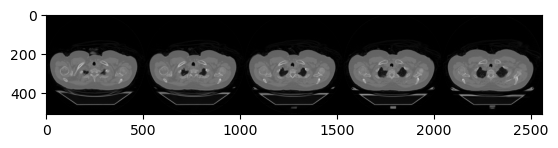

In [5]:
#carregando as imagens

im1 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-220.dcm")
im2 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-221.dcm")
im3 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-222.dcm")
im4 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-224.dcm")
im5 = imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-225.dcm")

#nao consegui importar pelo github, por isso utilizei as imagens locais.
#im1 = imageio.imread("https://github.com/LuanCantalice/dcmstic/blob/main/chest-221.dcm")
#im2 = imageio.imread("https://github.com/LuanCantalice/dcmstic/blob/main/chest-221.dcm")
#im3 = imageio.imread("https://github.com/LuanCantalice/dcmstic/blob/main/chest-222.dcm")
#im4 = imageio.imread("https://github.com/LuanCantalice/dcmstic/blob/main/chest-224.dcm")
#im5 = imageio.imread("https://github.com/LuanCantalice/dcmstic/blob/main/chest-225.dcm")



imagens = [im1, im2, im3, im4, im5 ]
plt.imshow(np.hstack([im1, im2 , im3 , im4 , im5]), cmap="gray")

imagem 1


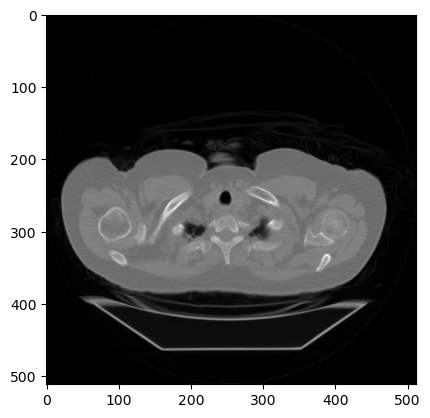

imagem 2


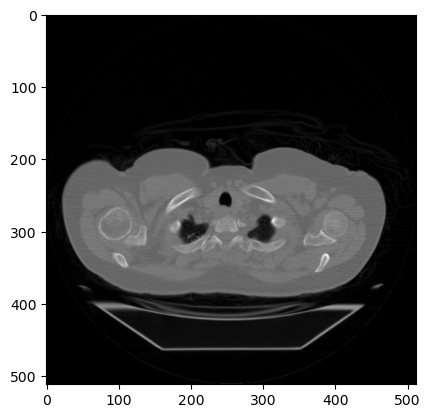

imagem3


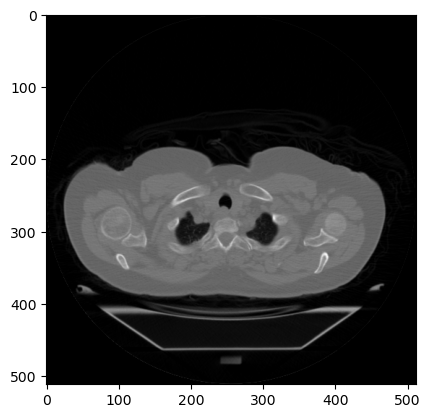

imagem4


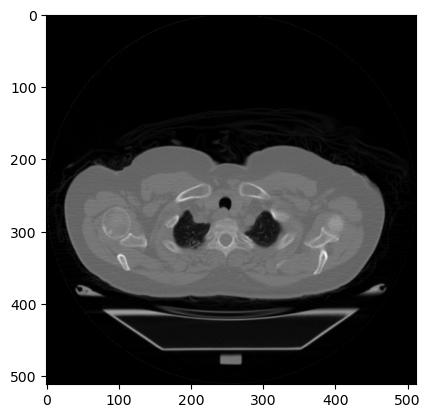

Imagem 5


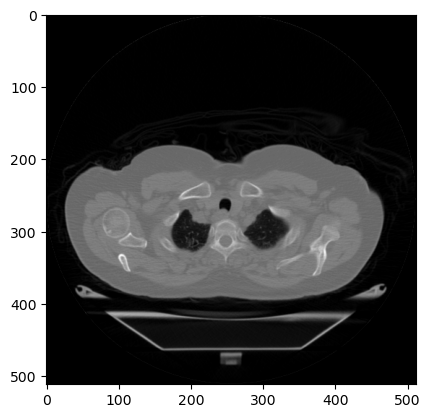

In [6]:
print("imagem 1")
plt.imshow(im1, cmap="gray")
plt.show()

print('imagem 2')
plt.imshow(im2, cmap="gray")
plt.show()

print('imagem3')
plt.imshow(im3, cmap="gray")
plt.show()

print("imagem4")
plt.imshow(im4, cmap="gray")
plt.show()

print('Imagem 5')
plt.imshow(im5, cmap="gray")
plt.show()

C:\Users\luan_\AppData\Local\Temp\ipykernel_8184\4284688648.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagens['im1']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-220.dcm")
C:\Users\luan_\AppData\Local\Temp\ipykernel_8184\4284688648.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagens['im2']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-221.dcm")
C:\Users\luan_\AppData\Local\Temp\ipykernel_8184\4284688648.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread.

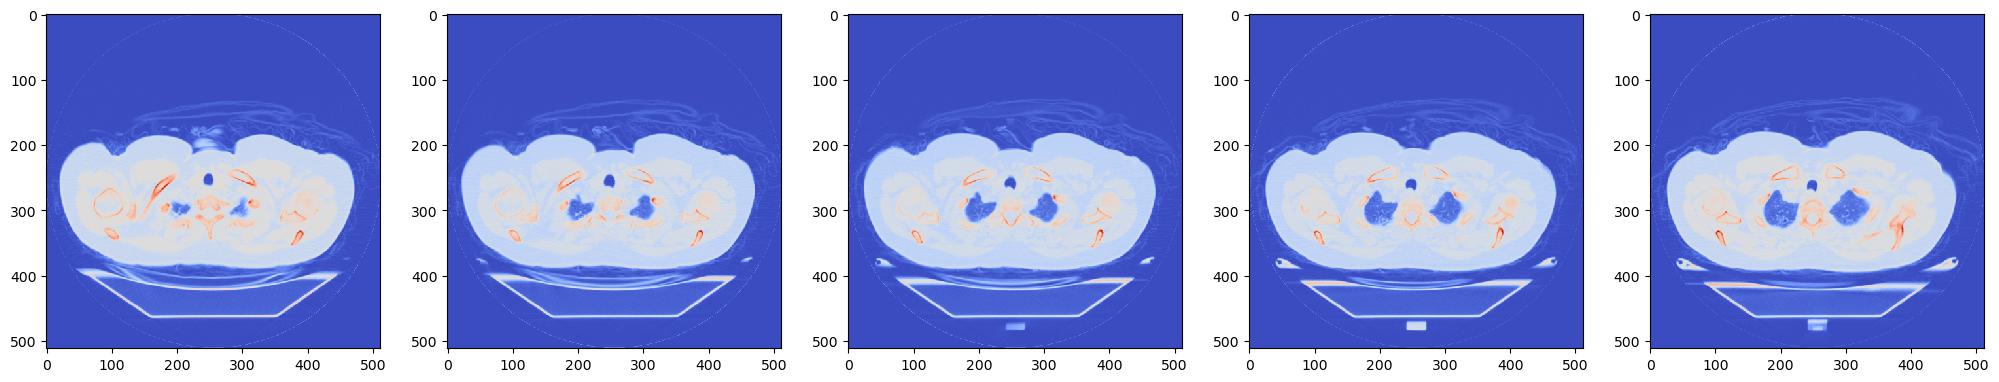

In [7]:
plt.rcParams['image.cmap'] = 'coolwarm'
plt.rcParams['image.interpolation'] = 'nearest'
imagens={}
imagens['im1']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-220.dcm")
imagens['im2']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-221.dcm")
imagens['im3']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-222.dcm")
imagens['im4']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-224.dcm")
imagens['im5']=imageio.imread(r"C:\Users\luan_\OneDrive\Área de Trabalho\dcms\chest-225.dcm")


hist_2d, x_edges, y_edges = np.histogram2d(imagens['im1'].ravel(),imagens['im2'].ravel(),bins=20)
fig,axes=plt.subplots(1,5,figsize=(25,15))
axes[0].imshow(imagens['im1'])
axes[1].imshow(imagens['im2'])
axes[2].imshow(imagens['im3'])
axes[3].imshow(imagens['im4'])
axes[4].imshow(imagens['im5'])

Text(0.5, 1.0, 'Histograma 5')

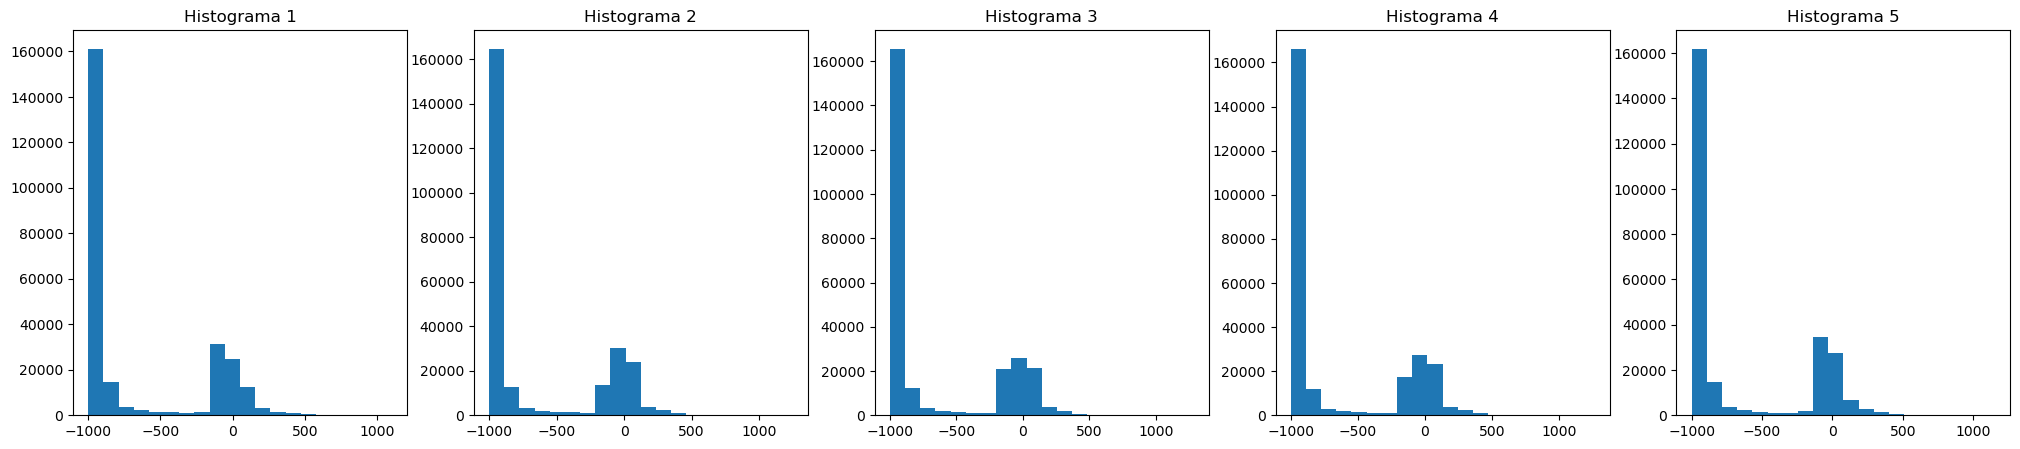

In [8]:
fig, axes = plt.subplots(1, 5, figsize= (25,5))
#Criando os histogramas das imagens
axes[0].hist(im1.ravel(), bins=20)
axes[0].set_title("Histograma 1")

axes[1].hist(im2.ravel(),bins=20)
axes[1].set_title("Histograma 2")

axes[2].hist(im3.ravel(), bins=20)
axes[2].set_title("Histograma 3")

axes[3].hist(im4.ravel(),bins=20)
axes[3].set_title("Histograma 4")

axes[4].hist(im5.ravel(), bins=20)
axes[4].set_title("Histograma 5")

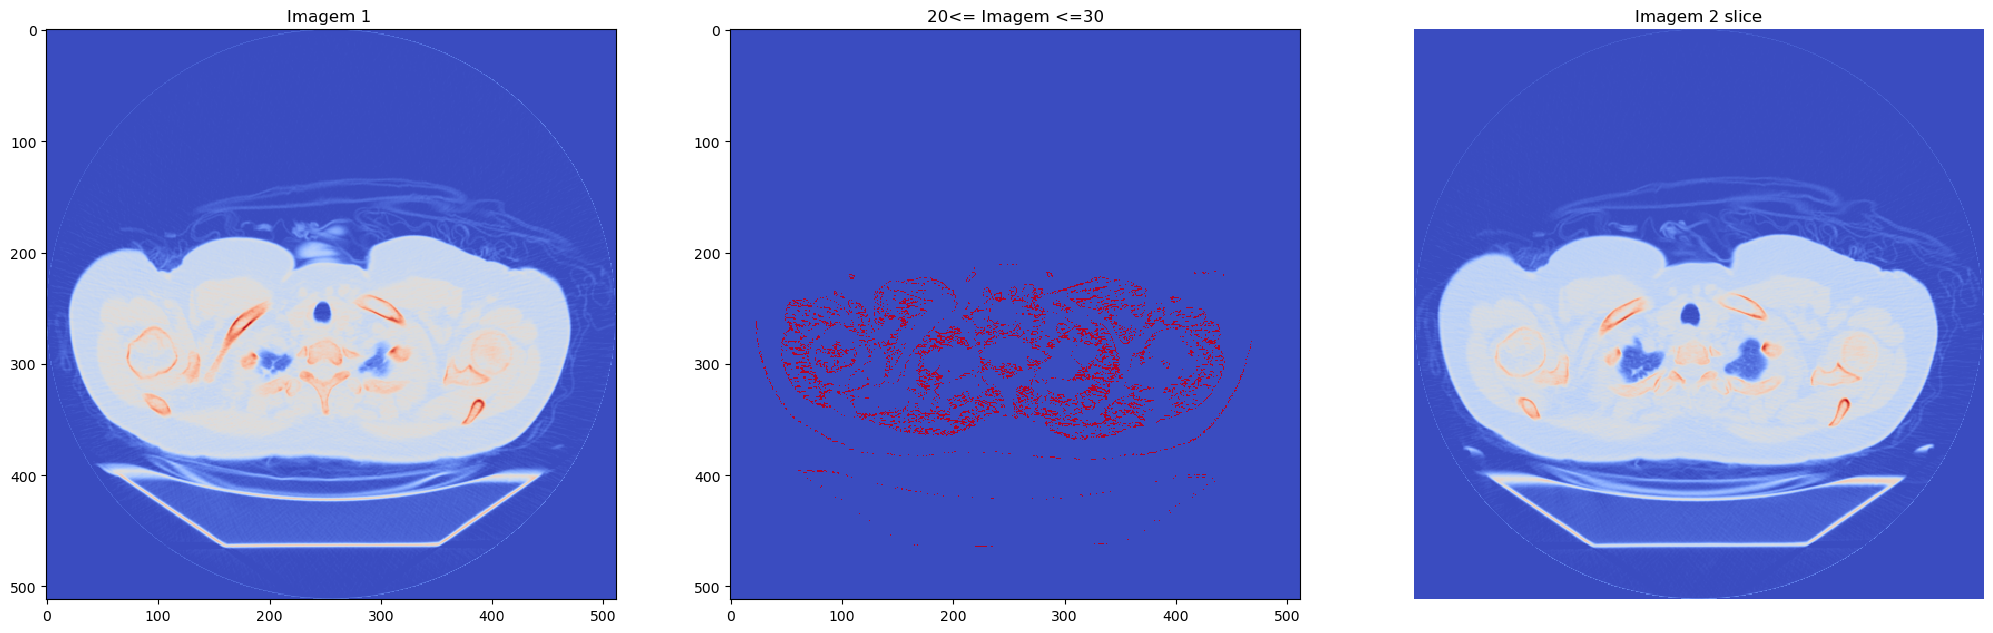

In [9]:
#comparações da imagem
im1_20_30 = (imagens['im1'] >= 1) & (imagens['im1'] <= 30)
fig, axes = plt.subplots(1, 3, figsize=(25,15))
axes[0].imshow(imagens['im1'])
axes[0].set_title('Imagem 1 ')
plt.axis('off')
axes[1].imshow(im1_20_30)
axes[1].set_title('20<= Imagem <=30')
plt.axis('off')
axes[2].imshow(imagens['im2'])
axes[2].set_title('Imagem 2 slice')
plt.axis('off')
plt.show()

In [10]:
#Redimensionamento e Normalização
im1 = (im1 - np.min(im1)) / (np.max(im1) - np.min(im1))
im2 = (im2 - np.min(im2)) / (np.max(im2) - np.min(im2))
im3 = (im3 - np.min(im3)) / (np.max(im3) - np.min(im3))
im4 = (im4 - np.min(im4)) / (np.max(im4) - np.min(im4))
im5 = (im5 - np.min(im5)) / (np.max(im5) - np.min(im5))

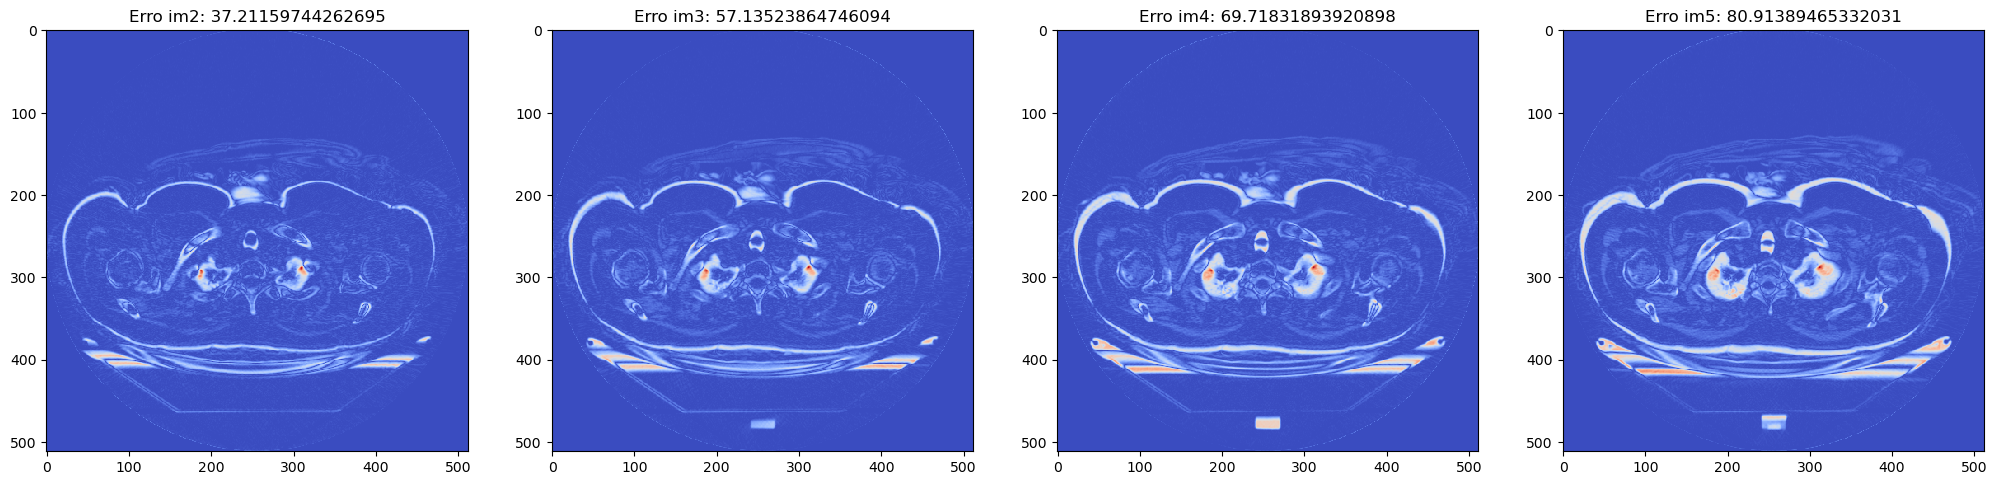

In [11]:
fig,axes=plt.subplots(1,4,figsize=(25,15))
#calcula diferença entre as imagens

dif_im2 = imagens['im1'] - imagens['im2']
valor_abs_dif_im2 = np.abs(imagens['im1']- imagens['im2'])
erro_med_abs_im2 = np.mean(valor_abs_dif_im2)
axes[0].set_title(f'Erro im2: {erro_med_abs_im2}')
axes[0].imshow(valor_abs_dif_im2,cmap='coolwarm')

dif_im3 = imagens['im1'] - imagens['im3']
valor_abs_dif_im3 = np.abs(imagens['im1'] - imagens['im3'])
erro_med_abs_im3 = np.mean(valor_abs_dif_im3)
axes[1].set_title(f'Erro im3: {erro_med_abs_im3}')
axes[1].imshow(valor_abs_dif_im3,cmap='coolwarm')

dif_im4 = imagens['im1'] - imagens['im4']
valor_abs_dif_im4 = np.abs(imagens['im1'] - imagens['im4'])
erro_med_abs_im4 = np.mean(valor_abs_dif_im4)
axes[2].set_title(f'Erro im4: {erro_med_abs_im4}')
axes[2].imshow(valor_abs_dif_im4,cmap='coolwarm')

dif_im5 = imagens['im1'] - imagens['im5']
valor_abs_dif_im5 = np.abs(imagens['im1'] - imagens['im5'])
erro_med_abs_im5 = np.mean(valor_abs_dif_im5)
axes[3].set_title(f'Erro im5: {erro_med_abs_im5}')
axes[3].imshow(valor_abs_dif_im5,cmap='coolwarm')

In [12]:
#remoção de ruido utilizando um filtro capaz de reduzir o nível de ruído de um sinal de entrada, a fim de diminuir a distorção.

im1 = gaussian_filter(im1, sigma=1)
im2 = gaussian_filter(im2, sigma=1)
im3 = gaussian_filter(im3, sigma=1)
im4 = gaussian_filter(im4, sigma=1)
im5 = gaussian_filter(im5, sigma=1)

Text(0.5, 1.0, 'Img1 vs Img5')

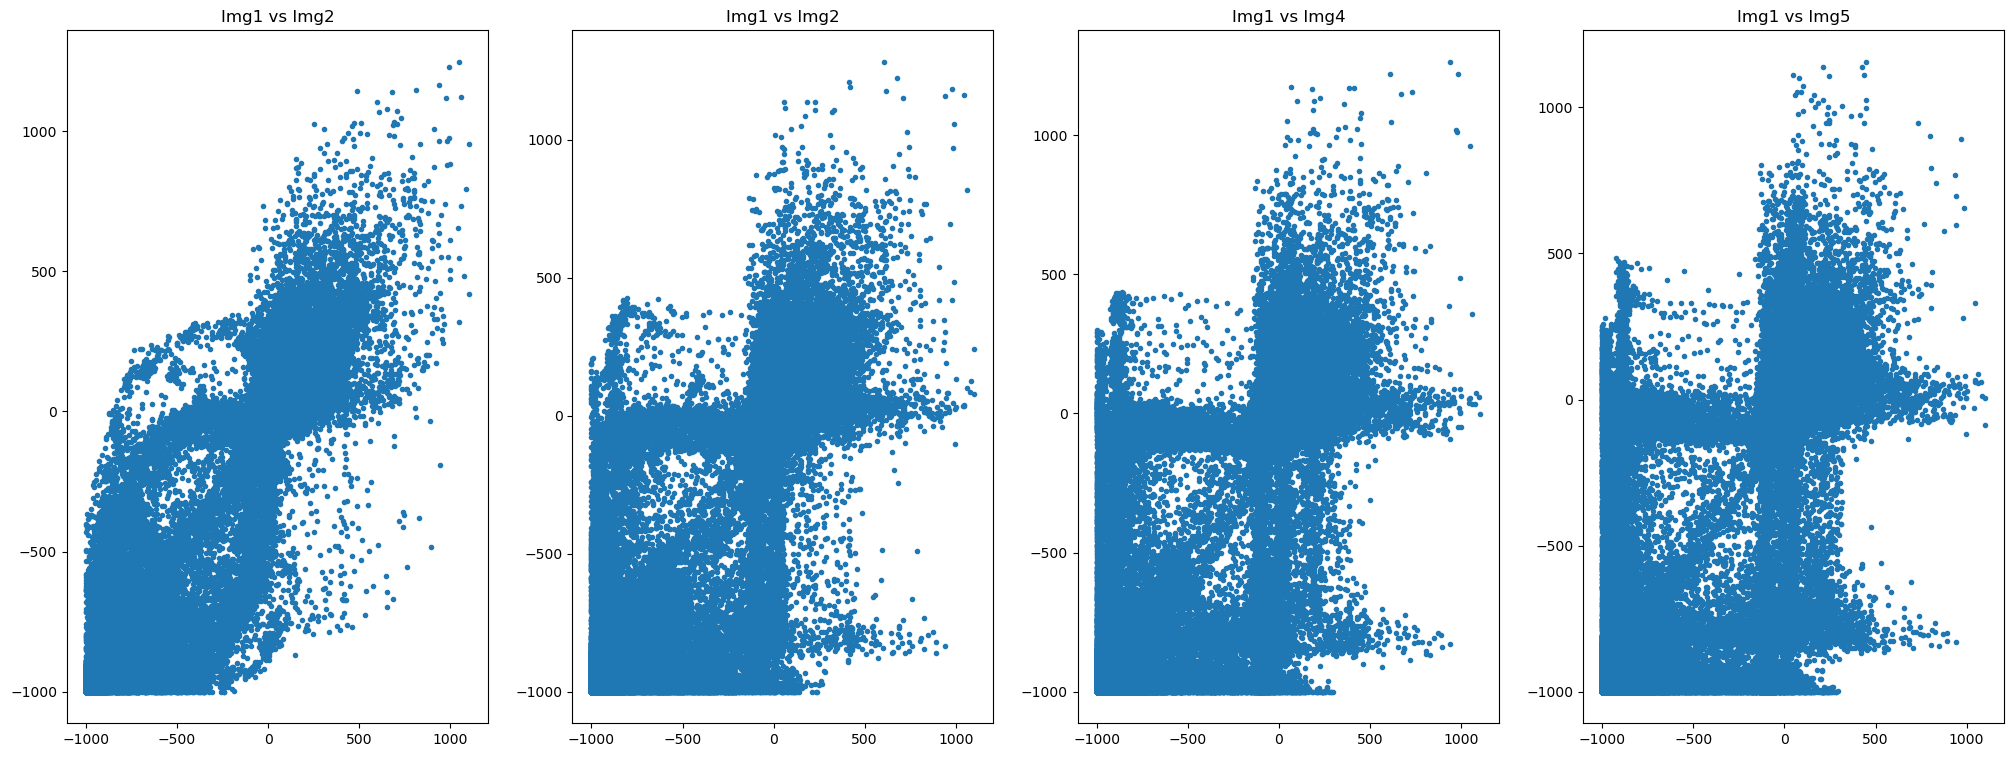

In [13]:
fig,axes=plt.subplots(1,4,figsize=(25,9))
# comparando intesidade de pixel das imagens

axes[0].plot(imagens['im1'].ravel(), imagens['im2'].ravel(), '.')
axes[0].set_title('Img1 vs Img2')

axes[1].plot(imagens['im1'].ravel(), imagens['im3'].ravel(), '.')
axes[1].set_title('Img1 vs Img2')

axes[2].plot(imagens['im1'].ravel(), imagens['im4'].ravel(), '.')
axes[2].set_title('Img1 vs Img4')

axes[3].plot(imagens['im1'].ravel(), imagens['im5'].ravel(), '.')
axes[3].set_title('Img1 vs Img5')

In [17]:
imagens = [im1, im2, im3, im4, im5]
n = len(imagens)

#matriz para armazenar as Mutual Information entre todas as combinações
mi_matrix = np.zeros((n, n))

#loop entre as comparações.
for i in range(n):
    for j in range(n):
        if i != j:
            mi = mutual_info_regression(imagens[i].reshape(-1, 1), imagens[j].ravel())  # retornando valores de informação mutua
            mi_matrix[i, j] = mi

print("Matriz de Mutual Information:")
print(mi_matrix)

#valor máximo de MI e os pares correspondentes.
max_mi = np.max(mi_matrix)
argmax_mi = np.unravel_index(np.argmax(mi_matrix), mi_matrix.shape)
print(f"Mutual Information Max: {max_mi}")
print(f"Pares correspondentes: Img {argmax_mi[0]} & Img {argmax_mi[1]}")

In [15]:
#divergência de Kullback-Leibler:
def image_to_probability_distribution(image):
    hist, _ = np.histogram(image, bins=256, range=(0, 256), density=True)
    return hist

def kl_divergence(p, q):
    return np.sum(kl_div(p, q))

def calculate_kl_divergence(images):
    num_images = len(images)
    kl_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(num_images):
            if i != j:
                kl_matrix[i, j] = kl_divergence(images[i], images[j])

    return kl_matrix

kl_matrix = calculate_kl_divergence([im1, im2, im3, im4, im5])
print("Matriz de KL Divergence:")
print(kl_matrix)

Matriz de KL Divergence:
[[   0.         1657.48206806 4093.98896513           inf           inf]
 [1342.53062457    0.         1362.49043664           inf           inf]
 [3410.21908951 1361.09837518    0.                   inf           inf]
 [5383.34464406 3690.44502701 1198.5795275     0.                   inf]
 [7057.94125705 6073.35286729 3871.18905879 1451.71492148    0.        ]]


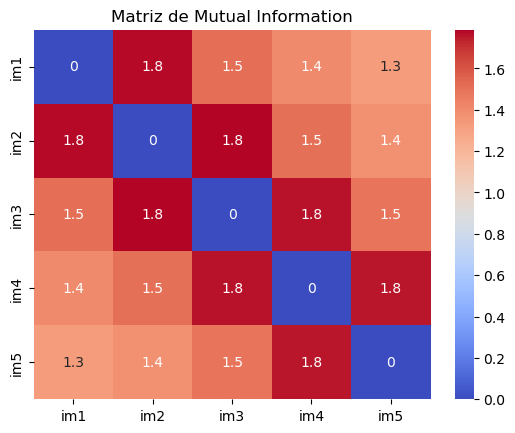

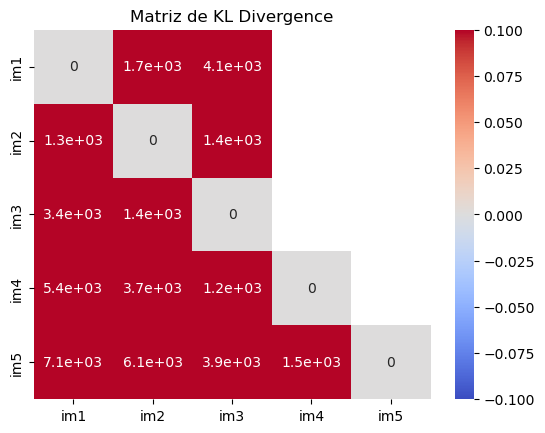

In [16]:
sns.heatmap(mi_matrix, annot=True, cmap='coolwarm', xticklabels=['im1', 'im2', 'im3', 'im4', 'im5'], yticklabels=['im1', 'im2', 'im3', 'im4', 'im5'])
plt.title('Matriz de Mutual Information')
plt.show()

sns.heatmap(kl_matrix, annot=True, cmap='coolwarm', xticklabels=['im1', 'im2', 'im3', 'im4', 'im5'], yticklabels=['im1', 'im2', 'im3', 'im4', 'im5'])
plt.title('Matriz de KL Divergence')
plt.show()

O início do projeto envolveu o carregamento das imagens médicas, sua visualização e a realização de um estágio de processamento inicial crucial. Este processo incluiu a adaptação do tamanho e a padronização das imagens, juntamente com a eliminação de qualquer ruído presente. Estas etapas são de extrema importância para assegurar que as imagens estejam em um formato adequado para as análises subsequentes.

Para analisar as imagens utilizei:

Informação Mútua: Realizamos o cálculo da MI para todas as possíveis combinações de imagens. A matriz de MI nos forneceu informações acerca das interdependências entre as imagens. Constatamos que algumas imagens compartilhavam informações significativas, ao passo que outras eram mais independentes umas das outras.

Divergência KL: Efetuamos o cálculo da divergência KL entre pares de imagens. Esta métrica quantificou a disparidade entre as distribuições de probabilidade das intensidades de pixels nas imagens. Valores mais elevados na Divergência KL indicaram uma maior diferença entre as imagens.

Baseando-nos nas métricas de MI e Divergência KL, conseguimos identificar relações e distinções entre as imagens. Notamos que as imagens com características semelhantes apresentaram valores mais elevados de MI, enquanto as imagens com conteúdo substancialmente diferente resultaram em valores mais altos na Divergência KL, tanto que, esses resultados indicam que as medidas comparativas de informação podem ser valiosas para avaliar a semelhança e a disparidade entre as imagens médicas. Isso tem implicações significativas no âmbito de diagnósticos médicos e análises clínicas, onde a habilidade de discernir entre imagens é muito importante.

Por fim, é essencial salientar que este projeto representa uma investigação preliminar. Existem diversas limitações, como a seleção específica de imagens e o tamanho da amostra utilizado.